In [ ]:
from sympy import *
from sympy.series.sequences import RecursiveSeq
import pandas as pd
import matplotlib.pyplot as plt

Практическое занятие\
**Модели безработицы Холла и Оукена**

#1.

**Модель естественного уровня безработицы Холла**

$s - $ доля занятых, которые ежемесячно теряют работу, $ s = \text{const}$\
$f - $ доля безработных, которые ежемесячно находят работу, $f = \text{const}$\
$L - $ численность экономически активного населения, $L = \text{const}$

$U_t - $ численность безработных\
$E_t - $ численность трудоустроенных\
$\forall t$ справедливо $L = U_t + E_t$ в состоянии макроэкономического равновесия

$u_t = U_t/L - $ уровень безработицы

Исходя из изложенных предпосылок\
$f \cdot U_t = s \cdot E_t ⇒ f ⋅ U_t = s \cdot (L - U_t) \ \ \ /L$\
$f ⋅ u_t = s \cdot (1 - u_t) ⇒ u_t = s / (s+f)$

# 2.

В рамках модели Холла покажите, что при движении рынка труда к равновесному состоянию уровень безработицы стремится к естественному уровню

In [ ]:
u = Function('u')
t = Symbol('t')

In [ ]:
s = 0.01 # ежемесячно от работающих людей теряет работу
f = 0.2 # ежемесячно находит работу
u0 = 0.068 # текущий уровень безработицы

In [ ]:
NUR = s/(s + f); NUR # естественный уровень безработицы

0.047619047619047616

In [ ]:
# Покажем, что с течением времени фактический уровень
# безработицы установится на уровне естественном

In [ ]:
# Для этого построим рекуррентное соотношение, связывающее
# текущий уровень безработицы с естественным

Справедливо рекуррентное соотношение:\
$U_t = U_{t-1} - f ⋅ U_{t-1} + s ⋅ E_{t-1}$\
$U_t = (1 - f) ⋅ U_{t-1} + s ⋅ (L - U_{t-1}) / L$\
$u_t = [1 - (s + f)] ⋅ u_{t-1} + s$

In [ ]:
UR = RecursiveSeq((1 - s - f)*u(t-1) + s, u(t), t, [u0]); UR

RecursiveSeq(0.79*u(t - 1) + 0.01, u(t), t, (0.068,), 0)

In [ ]:
# Построим таблицу уровней безработицы и уровней недопроизводства валового продукта
# в рамках модели Оукена:

$δ_t = 2.5 ⋅ (u_t - u^*) $\
$\delta_t = (Y^* - Y_t)/Y^*$\
$Y^* - $ потенциальный валовой продукт в экономике\
$u_t - u^* - $ уровень циклической безработицы

In [ ]:
u_List = []; d_List = []; uc_List = []
for x in zip(range(34), UR):
  u_List.append(x[1])
  d_List.append(2.5*(x[1] - NUR))
  uc_List.append(x[1] - NUR)

In [ ]:
df = pd.DataFrame(list(zip(*[u_List, d_List, uc_List])), columns = ['u', 'delta', 'uc']); df

,u,delta,uc
0,0.0680000000000000,0.0509523809523810,0.0203809523809524
1,0.0637200000000000,0.0402523809523810,0.0161009523809524
2,0.0603388000000000,0.0317993809523810,0.0127197523809524
3,0.0576676520000000,0.0251215109523810,0.0100486043809524
4,0.0555574450800000,0.0198459936523810,0.00793839746095239
5,0.0538903816132000,0.0156783349853810,0.00627133399415240
6,0.0525734014744280,0.0123858846384510,0.00495435385538040
7,0.0515329871647981,0.00978484886437630,0.00391393954575052
8,0.0507110598601905,0.00773003060285729,0.00309201224114292
9,0.0500617372895505,0.00610672417625727,0.00244268967050291


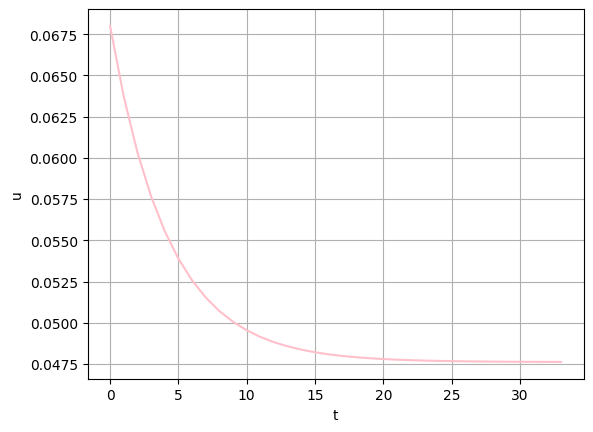

In [ ]:
# Построим траекторию приближения фактических уровней безработицы к
# естественному уровню
plt.xlabel('t')
plt.ylabel('u')
plt.grid()
plt.plot(u_List, color='pink')

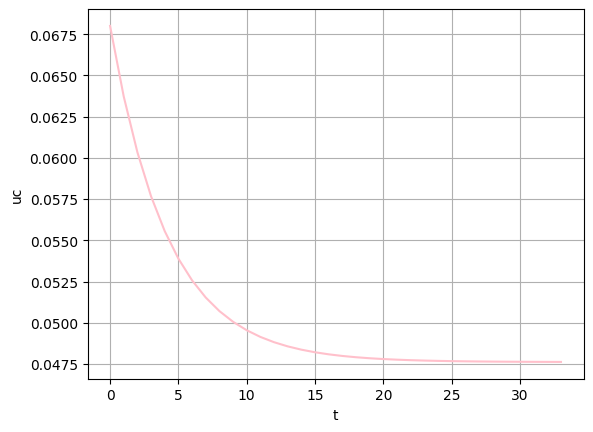

In [ ]:
plt.xlabel('t')
plt.ylabel('uc')
plt.grid()
plt.plot(u_List, color='pink')